In [ ]:
# Core packages
!pip install numpy
!pip install scipy
!pip install scikit-learn
!pip install matplotlib

# Audio processing
!pip install librosa
!pip install soundata

# Deep learning
!pip install tensorflow

# Audio evaluation metrics
!pip install pypesq

# Additional dependencies (might be needed depending on your system)
!pip install resampy  # Used by librosa for resampling
!pip install numba    # Used by librosa for acceleration
!pip install soundfile  # Used by soundata for audio I/O

In [ ]:

# Install pypesq from a maintained fork:
!pip install https://github.com/vBaiCai/python-pesq/archive/master.zip

# Install pystoi:
!pip install pystoi

# Or if that fails, try:
!pip install https://github.com/mpariente/pystoi/archive/master.zip

In [1]:
import numpy as np
import soundata
import librosa
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.metrics import mean_squared_error
# import tensorflow as tf
# from tensorflow.keras import layers, models


In [2]:
import numpy as np
import sys
# Fix for NumPy 2.0 compatibility
if hasattr(np, 'float_'):
    pass  # Already exists (NumPy < 2.0)
else:
    np.float_ = np.float64
    np.int_ = np.int64

##Load dataset, verify download and test sample audios

INFO: Downloading ['all', 'index']. Index is being stored in /data/users/tqiu5/conda/envs/cse676-cleanunet/lib/python3.9/site-packages/soundata/datasets/indexes, and the rest of files in /data/users/tqiu5/CleanUNet/urbansound8k
INFO: [all] downloading UrbanSound8K.tar.gz
INFO: /data/users/tqiu5/CleanUNet/urbansound8k/UrbanSound8K.tar.gz already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.
INFO: /data/users/tqiu5/CleanUNet/urbansound8k/FREESOUNDCREDITS.txt already exists. Run with force_overwrite=True to download from scratch
INFO: /data/users/tqiu5/CleanUNet/urbansound8k/UrbanSound8K_README.txt already exists. Run with force_overwrite=True to download from scratch
INFO: [index] downloading urbansound8k_index_1.0.json
INFO: /data/users/tqiu5/conda/envs/cse676-cleanunet/lib/python3.9/site-packages/soundata/datasets/indexes/urbansound8k_index_1.0.json already exists and will not be downloaded. Rerun with force_overwrite=Tru

Clip ID: 100032-3-0-0
Class: dog_bark, Sample Rate: 44100 Hz


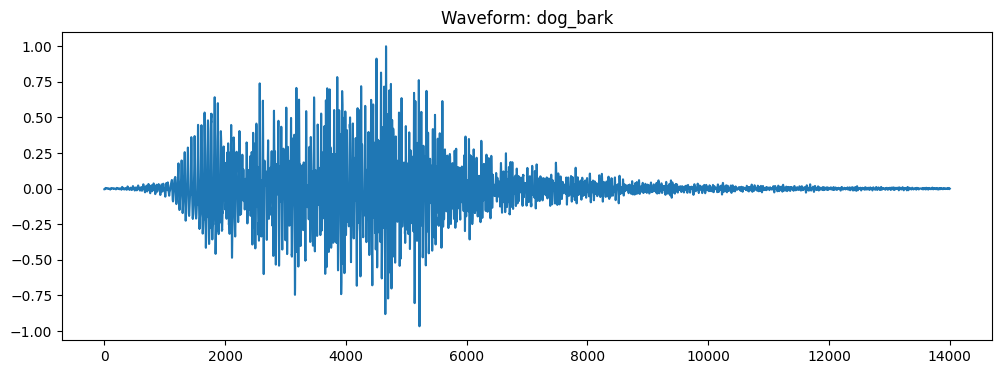

In [2]:
import soundata
import matplotlib.pyplot as plt

path = '/data/users/tqiu5/CleanUNet/urbansound8k'

# Initialize the dataset
urbansound8k = soundata.initialize("urbansound8k", data_home=path)

# # Download the dataset (only need to do this once)
urbansound8k.download()  # Downloads to ~/sound_datasets/urbansound8k

# Load a specific clip by ID (or use choice_clip() for random)
clip = urbansound8k.clip("100032-3-0-0")  # Example clip ID
print(f"Clip ID: {clip.clip_id}")

# Access audio and metadata
audio, sr = clip.audio  # Load audio data (now a property, not a method)
metadata = clip.to_jams()  # Get metadata

# Get the class label
class_label = metadata.annotations[0].data[0].value
print(f"Class: {class_label}, Sample Rate: {sr} Hz")

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(audio)
plt.title(f"Waveform: {class_label}")
plt.show()

In [3]:
import os
dataset_path = os.path.expanduser("/data/users/tqiu5/CleanUNet/urbansound8k")
if  os.path.exists(dataset_path):
    print("Dataset downloaded, continue")
else:
    urbansound8k.download()

Dataset downloaded, continue


Class: street_music, Duration: 4.00s


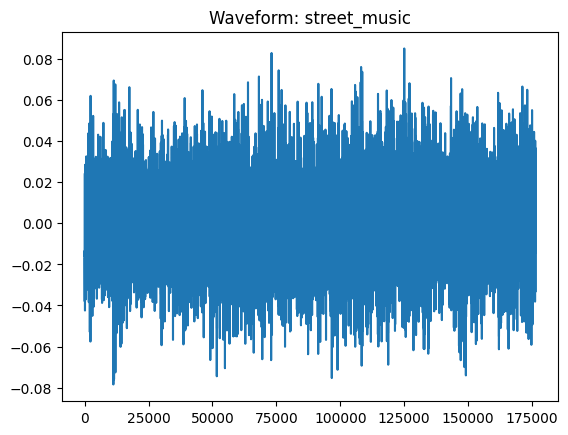

In [16]:
# Load a RANDOM clip

cliprandom = urbansound8k.choice_clip()  # Random selection

audiorandom, srRandom = cliprandom.audio
metadatarandom = cliprandom.to_jams()
class_label = metadatarandom.annotations[0].data[0].value

print(f"Class: {class_label}, Duration: {len(audiorandom)/sr:.2f}s")
plt.plot(audiorandom)
plt.title(f"Waveform: {class_label}")
plt.show()

In [17]:
import numpy as np
from scipy.signal import butter, lfilter
from IPython.display import Audio, display
import matplotlib.pyplot as plt

#Add noise to Urban8k

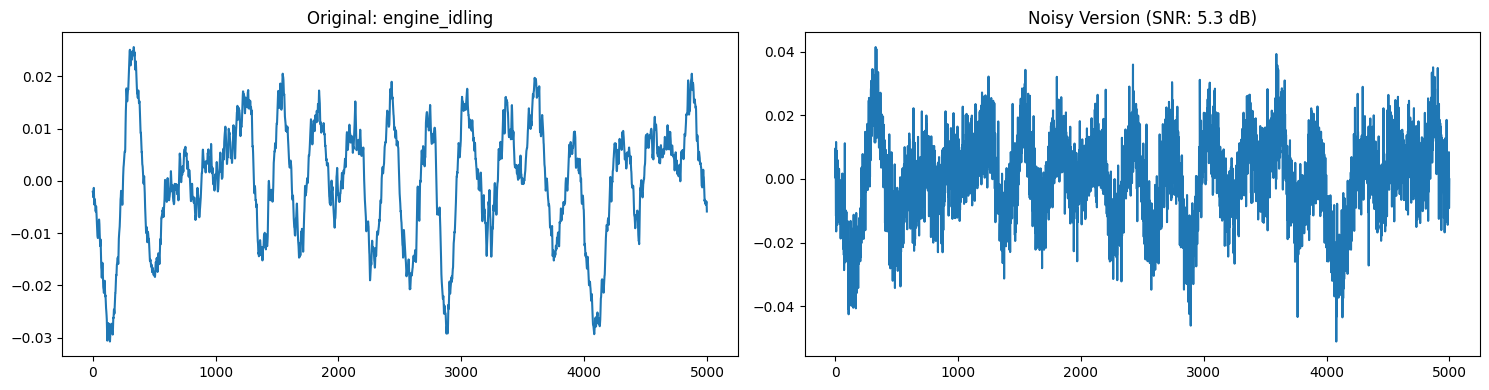

Original:


Noisy:


In [18]:
clip = urbansound8k.choice_clip()
audio, sr = clip.audio
class_label = clip.to_jams().annotations[0].data[0].value

# Add 10% Gaussian noise (adjust noise_level as needed)
noise_level = 0.1
noise = np.random.normal(0, noise_level * np.max(np.abs(audio)), len(audio))
noisy_audio = audio + noise

# Plot comparison
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(audio[:5000])
plt.title(f"Original: {class_label}")

plt.subplot(1, 2, 2)
plt.plot(noisy_audio[:5000])
plt.title(f"Noisy Version (SNR: {10*np.log10(np.var(audio)/np.var(noise)):.1f} dB)")
plt.tight_layout()
plt.show()

# Play audio
print("Original:")
display(Audio(audio, rate=sr))
print("Noisy:")
display(Audio(noisy_audio, rate=sr))

# Save noisy version (optional)
# wavfile.write(f"noisy_{clip.clip_id}.wav", sr, noisy_audio) street music

##Test lowpass filter

In [13]:
def lowpass_filter(audio, cutoff, sr, order=4):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return lfilter(b, a, audio)

# Filter out frequencies above 1000 Hz
filtered_audio = lowpass_filter(noisy_audio, cutoff=1000, sr=sr)

In [14]:
print("Original (+ Noise):")
display(Audio(noisy_audio, rate=sr))

print("\nFiltered (Noise Removed):")
display(Audio(filtered_audio, rate=sr))


Original (+ Noise):



Filtered (Noise Removed):


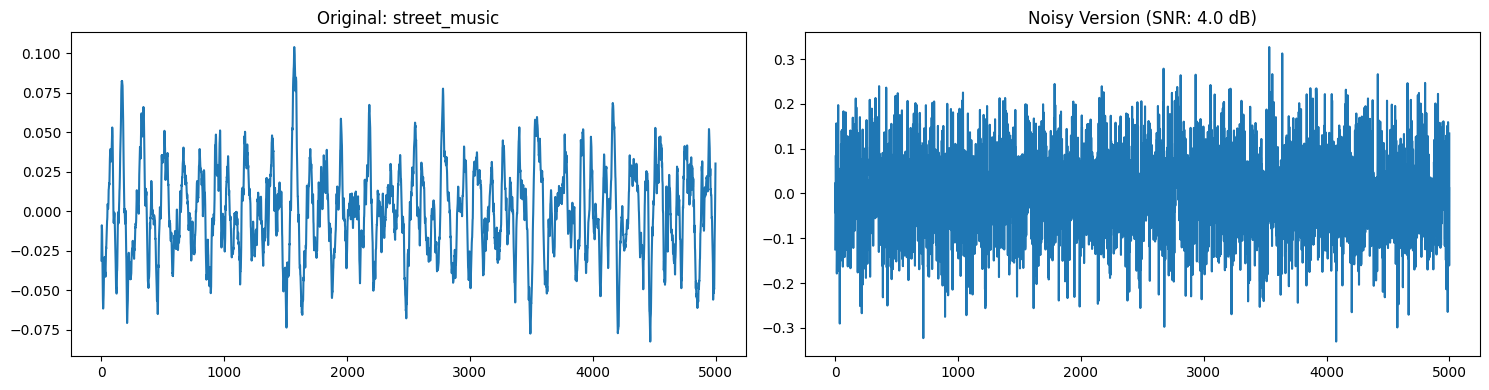

Text(0.5, 1.0, 'cleaned version: street_music')

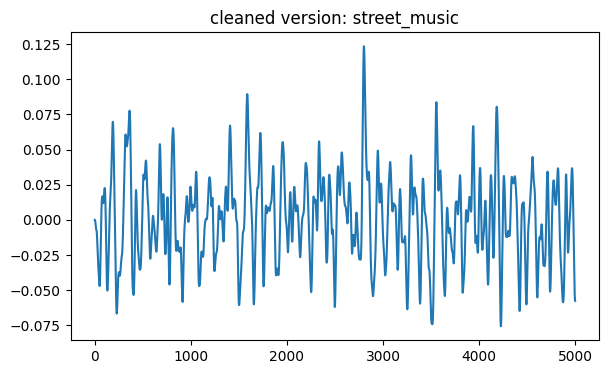

In [16]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(audio[:5000])
plt.title(f"Original: {class_label}")

plt.subplot(1, 2, 2)
plt.plot(noisy_audio[:5000])
plt.title(f"Noisy Version (SNR: {10*np.log10(np.var(audio)/np.var(noise)):.1f} dB)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(filtered_audio[:5000])
plt.title(f"cleaned version: {class_label}")

## Other traditional filters

In [17]:
def bandpass_filter(audio, lowcut, highcut, sr, order=4):
    nyquist = 0.5 * sr
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band', analog=False)
    return lfilter(b, a, audio)

In [18]:
def highpass_filter(audio, cutoff, sr, order=4):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return lfilter(b, a, audio)

In [19]:
def notch_filter(audio, cutoff, sr, Q=30):
    nyquist = 0.5 * sr
    freq = cutoff / nyquist
    b, a = butter(2, [freq-0.01, freq+0.01], btype='bandstop', analog=False)
    return lfilter(b, a, audio)

Original (+ Noise):



Filtered (Noise Removed):


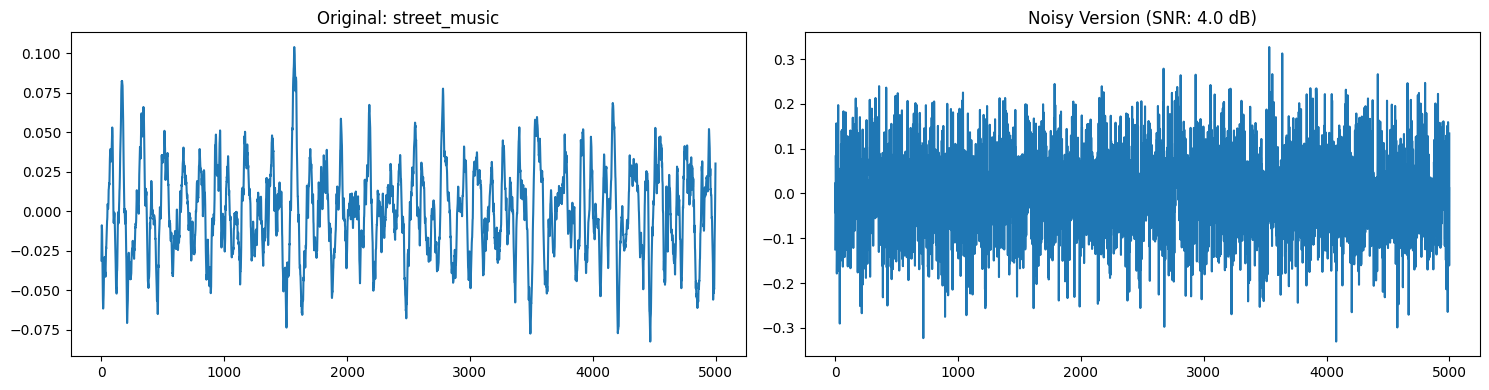

Text(0.5, 1.0, 'cleaned version: street_music')

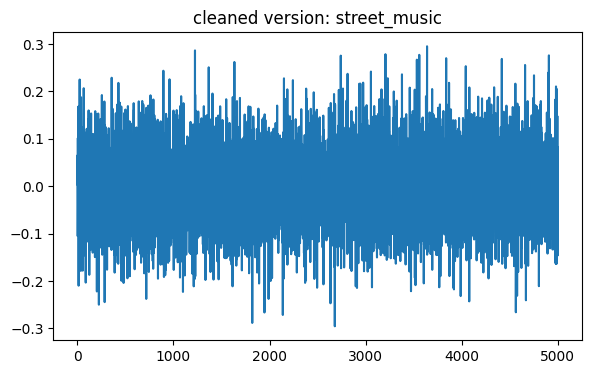

In [20]:
filtered_audio2 = highpass_filter(noisy_audio, cutoff=1000, sr=sr)
print("Original (+ Noise):")
display(Audio(noisy_audio, rate=sr))

print("\nFiltered (Noise Removed):")
display(Audio(filtered_audio, rate=sr))

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(audio[:5000])
plt.title(f"Original: {class_label}")

plt.subplot(1, 2, 2)
plt.plot(noisy_audio[:5000])
plt.title(f"Noisy Version (SNR: {10*np.log10(np.var(audio)/np.var(noise)):.1f} dB)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(filtered_audio2[:5000])
plt.title(f"cleaned version: {class_label}")